# E1 - 가위바위보 분류기

### **프로젝트 개요:**  
이번 프로젝트는 가위, 바위, 보의 이미지를 구분해 내는 딥러닝 모델을 설계, 학습, 평가해 보고, 평가를 바탕으로 오버피팅(overfitting)의 문제점을 극복할 수 있는 방안을 고안해서 test의 정확도 60%를 달성해 보자. 

### **프로젝트 결과요약**    


**Test 1**   
1) 노드의 지시대로 가위, 바위, 보 이미지 100개씩을 (총 이미지 300개) 촬영해서 training data로 사용했다.  
2) 팀원의 가위, 바위, 보 이미지 300개를 test data로 이용했다.     
3) train, test 이미지들의 사이즈를 28\*28 픽셀로 조정했다.   
4) 딥러닝 네트워크 모델 Sequential 을 설정했다. (구체적인 모델설계 기준은 하단 참고)   
5) epoch 를 13으로 설정해준다. 숫자구분 노드의 epoch 10에서 살짝 상향 조정했다.      
6) **결과:** train 정확도는 100%로 매우 높게 나왔지만 test 의 정확도는 46%로 아쉽다.   


**Test 2**(관련 코드 E1.Rock_paper_scissor classification(Test2) 파일)   
1) Test 1에서 바꿔준 것은 과적합의 (overfitting) 문제를 해결하기 위해서 L2 regularization의 코드를 Sequential 모델에 추가해줬다.    
2) Test 1에서 모델을 돌려본 결과 epoch 10 이상에서는 정확도가 크게 증가하지 않았으므로 Test 2에서 epoch를 늘려주지 않았다.     
3) 또한, Sequential 모델의 인자값도 바꿔주지 않았는데 Test 1에서 정확도가 높게 나왔기 때문에 굳이 알고리즘을 더 복잡하게 하지 않아도 된다고 판단했다. 그러므로 Test 2, 3, 4에서 Sequential 모델의 인자들은 regularization을 제외하고는 바꾸지 않았다.    
4) **결과:** train 의 정확도는 100%, test의 정확도는 56%로 상승했다.    


**Test 3**   
1) Test 2에서 바꿔준것은 training의 데이터를 300에서 900으로 늘려줬다. 또한, 다른 두 사람의 이미지를 600장 (각 300장씩) 가져다 쓰므로써, 데이터의 다양성을 확보할 수 있었다.    
2) **결과:** train 의 정확도는 88% 로 감소했지만 test의 정확도는 43%로 줄어들었다.    


**Test 4**(관련 코드 하단에 첨부)  
1) Test 3에서 바꿔준 것은 이미지 크기를 28\*28에서 100\*100으로 조정했다.      
2) **결과:** train 의 정확도는 89%로 비슷하고 test의 정확도는 46% 로 상승했지만 Test2의 test 정확도 보다는 낮다. 


**결론: Test 2의 train, test 정확도가 가장 높다.** 

Item | Test 1 | Test 2 | Test 3| Test 4
---|---:|---:|---:|---:
Image Size|28\*28| 28\*28|28\*28 |100\*100
Number of Train Images|300| 300|900| 900
Number of Writer for Train Data|1|1|3|3
Number of Test Images|300|300|300|300
Number of Writer for Test Data|1|1|1|1
Regularization|No| Yes-L2| Yes-L2|Yes-L2
Train Accuracy Score|100% |100%|88%| 89%
Test Accuracy Score|46%| 56%|43%|46%

### (1) 필요한 모듈 import하기

In [123]:
from PIL import Image
import os, glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

### (2) 이미지 사이즈로 변경

In [124]:
# 이미지 변경 함수 만들기 

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 100*100 사이즈로 바꾸어 저장합니다.
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


In [125]:
# 가위 이미지 변경 
image_dir_path_s = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path_s)

print("가위 이미지 resize 완료!")

# 바위 이미지 변경 
image_dir_path_r = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path_r)

print("바위 이미지 resize 완료!")


# 보 이미지 변경
image_dir_path_p = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path_p)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### (2)-1 새로운 Train Data 이미지 변경해주기 

In [126]:
# 과적합을 막기 위해서 두명의 이미지 (600개)를 trainig data set에 넣어줬다. 

# 가위 이미지 변경 
image_dir_path_s2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor2"
resize_images(image_dir_path_s2)

image_dir_path_s3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor3"
resize_images(image_dir_path_s3)

# 바위 이미지 변경 
image_dir_path_r2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock2"
resize_images(image_dir_path_r2)

image_dir_path_r3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock3"
resize_images(image_dir_path_r3)

# 보 이미지 변경
image_dir_path_p2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper2"
resize_images(image_dir_path_p2)

image_dir_path_p3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper3"
resize_images(image_dir_path_p3)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


### (3) 가위, 바위, 보 labeling 시키기 (가위=0, 바위=1, 보=2)

In [127]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissor/scissor3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/rock/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1   
        
    for file in glob.iglob(img_path+'/rock/rock3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/paper3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 100, 100, 3)
y_train shape: (900,)


라벨:  0


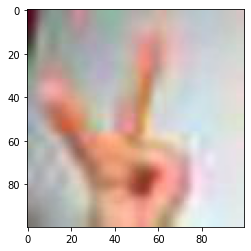

In [128]:
# 이미지 불러 보기 
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### (4) 딥러닝 네트워크 설계 

In [129]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu')) # added L2 Regularizer
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


아래 그림은노드 1-3 (딥러닝 네트워크 설계하기)에서 가져온 그림이다. 이 그림에 나와있는 설명을 토대로 딥러닝 모델의 변수값을 조정해줬다. 참고로 input_shape은 Test4에서 이미지의 사이즈를 조정해 줬을때 (100,100,3)으로 업데이트 했다. 그리고 과적합 방지를 위해 Test 2,3,4 에서 L2 regularization(kernel_regularizer=keras.regularizers.l2(0.001))을 Dense함수에 넣어줬다. 

1. Conv2D의 첫번째 변수는(아래 그림에서 16) 입력 이미지가 다양할 수록 수로 높아진다. 가위, 바위, 보의 이미지는 우리가 노드에서 공부했던 숫자의 이미지보다 더 다양한 특징을 갖을것 같다. 왜냐하면 손가락 5개의 움직임뿐만 아니라 손의 움직임까지 다 고려해야 하기 때문에. 그러므로 처음엔 16의 4배수인 64로 해줬다. 
2. Conv2D의 마지막 변수인 input_shape인 입력 이미지의 형태이다. 여기서는 (28, 28, 3)으로 해줘야 한다. 사진을 28\*28로 크기를 조정해 줬고 컬러 이미지이기 때문에 마지막 값은 3이 됀다 (RBG의 값). Test 4에서는 (100, 100, 3)으로 변경했다. 
3. 두번째 Conv2D의 첫번째 변수는 64의 2배수인 128로 해줬다. 
4. Dense 함수에서 첫번째 변수는 분류기 알고리즘을 얼마나 복잡하게 할 것인가의 문제다. 앞에서 언급했듯이 숫자의 이미지보다 복잡한 알고리즘이 필요할 것 같다. 그러므로 32의 4배수인 128로 해준다. 
5. 마지막 Dense함수의 첫번째 변수는 최종 분류기의 class 수. 여기서는 가위, 바위, 보 3가지 이다. 그러므로 3으로 정해준다. 

![이미지](https://d3s0tskafalll9.cloudfront.net/media/images/F-1-5.max-800x600.png)

In [130]:
# 입력변수의 형태 확인 - 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태여야 함. 확인완료! 
print(x_train.shape)

(900, 100, 100, 3)


### (5) 딥러닝 네트워크 학습시키기 

In [131]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=13) # 에포크를 10(노드의 에포크)에서 13으로 조금 조정해 주었음


Epoch 1/13
29/29 [==============================] - 2s 36ms/step - loss: 408.3304 - accuracy: 0.4132
Epoch 2/13
29/29 [==============================] - 1s 33ms/step - loss: 1.0081 - accuracy: 0.6720
Epoch 3/13
29/29 [==============================] - 1s 33ms/step - loss: 0.6844 - accuracy: 0.7955
Epoch 4/13
29/29 [==============================] - 1s 33ms/step - loss: 0.5406 - accuracy: 0.8744
Epoch 5/13
29/29 [==============================] - 1s 33ms/step - loss: 0.5088 - accuracy: 0.8912
Epoch 6/13
29/29 [==============================] - 1s 33ms/step - loss: 0.4582 - accuracy: 0.8789
Epoch 7/13
29/29 [==============================] - 1s 33ms/step - loss: 0.4321 - accuracy: 0.8843
Epoch 8/13
29/29 [==============================] - 1s 32ms/step - loss: 0.4042 - accuracy: 0.8755
Epoch 9/13
29/29 [==============================] - 1s 33ms/step - loss: 0.4262 - accuracy: 0.8719
Epoch 10/13
29/29 [==============================] - 1s 33ms/step - loss: 0.7167 - accuracy: 0.7873
Epoch 1

### (6) 딥러닝 네트워크 평가하기 

#### (6)(a) test 디렉토리를 rock_scissor_paper folder 안에 만들어 주고 그 디렉토리 안에 rock, scissor, paper의 폴더를 별도로 만들어주었다. 

#### (6)(b) test 이미지 resize 해주기 

In [132]:
# 가위 이미지 변경 
image_dir_path_ts = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path_ts)

print("가위 이미지 resize 완료!")

# 바위 이미지 변경 
image_dir_path_tr = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path_tr)

print("바위 이미지 resize 완료!")


# 보 이미지 변경
image_dir_path_tp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path_tp)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### (6)(b) x_test, y_test 만들기 

In [133]:
def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
         
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_test(image_dir_path_test)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 100, 100, 3)
y_test shape: (300,)


#### (6)(c) test 데이터를 이용해서 모델 성능 테스트하기 

In [134]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.9507 - accuracy: 0.4633
test_loss: 2.950740337371826 
test_accuracy: 0.4633333384990692


### (7) 참고자료 - Regularization 

Overfit을 방지하기 위한 방법 (출처:https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

"간단한 모델"은 모델 파라미터의 분포를 봤을 때 엔트로피(entropy)가 작은 모델입니다(또는 앞 절에서 보았듯이 적은 파라미터를 가진 모델입니다). 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것입니다. 이는 가중치 값의 분포를 좀 더 균일하게 만들어 줍니다. 이를 "가중치 규제"(weight regularization)라고 부릅니다. 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가합니다. 이 비용은 두 가지 형태가 있습니다:

* L1 규제: 가중치의 절댓값에 비례하는 비용이 추가됩니다(즉, 가중치의 "L1 노름(norm)"을 추가합니다).
* L2 규제: 가중치의 제곱에 비례하는 비용이 추가됩니다(즉, 가중치의 "L2 노름"의 제곱을 추가합니다). 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다. 

L1 규제는 일부 가중치 파라미터를 0으로 만듭니다. L2 규제는 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않습니다. 이것이 L2 규제를 더 많이 사용하는 이유 중 하나입니다.

여기서는 L2를 이용해서 regularization 을 더해봤습니다. 
